<a href="https://colab.research.google.com/github/mtoce/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Assig2_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-18 21:33:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-03-18 21:33:43 (138 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [3]:
import pandas as pd
from scipy.stats import chisquare
import matplotlib.pyplot as plt

df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
from scipy.stats import t, ttest_1samp
import scipy.stats as stats
import numpy as np

In [0]:
df = df.replace({'y': 1, 'n': 0, '?': np.NaN})

In [6]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [7]:
df.describe()

,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
rep = df[df['party'] == 'republican']
dem = df[df['party'] == 'democrat']

***Goal 1: Generate and Numerically Represent a Confidence Interval***

In [9]:
rep = rep.dropna()

rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
28,republican,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
30,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
33,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
35,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [10]:
dem = dem.dropna()
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
19,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
23,democrat,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
25,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
26,democrat,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [11]:
print(dem.shape)
rep.shape

(124, 17)


(108, 17)

In [0]:
def confidence_interval(data, confidence=.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  # turn data into array
  data = np.array(data)
  # finds mean 
  mean = np.mean(data)
  n = len(data)
  std_err = stats.sem(data)
  dof = n - 1
  interval = std_err * stats.t.ppf((1 + confidence)/ 2.0, dof)
  return (mean, mean - interval, mean + interval)

In [13]:
mean, lower, upper = confidence_interval(dem['budget'])
print("Mean: ", mean)
print("Low end of Confidence Interval: ", lower)
print("High end of Confidence Interval: ", upper)

Mean:  0.8548387096774194
Low end of Confidence Interval:  0.791966749899413
High end of Confidence Interval:  0.9177106694554258


In [0]:
import seaborn as sns

Mean, ci_lower_bound, ci_upper_bound:  (0.8548387096774194, 0.791966749899413, 0.9177106694554258)


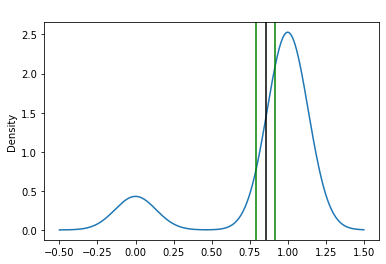

In [15]:
ci = confidence_interval(dem['budget'])
print("Mean, ci_lower_bound, ci_upper_bound: ", ci)

dem['budget'].plot.density()
plt.title("Democratic Budget Support", color='w')
plt.axvline(ci[0], color='black')
plt.axvline(ci[1], color='green')
plt.axvline(ci[2], color='green')

plt.show;

In [0]:
# Interperet the confidence interval. What does it tell you about the data?

# The confidence interval goes from 6% below to 6% above our mean which means
# that...

In [17]:
# Checking that bounds are symmetric
print(ci[0]-ci[1])
ci[2]-ci[0]

0.06287195977800641


0.06287195977800641

***Part 4: Chi Square Tests***

First we will do a chi-square test only using numpy

We will test years of education vs. hours per week and see if they are related.

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [19]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [20]:
df['hours-per-week'].value_counts().sort_index()

1     20
2     32
3     39
4     54
5     60
      ..
95     2
96     5
97     2
98    11
99    85
Name: hours-per-week, Length: 94, dtype: int64

In [21]:
df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [22]:
obs_freq = pd.crosstab(df['education-num'], df['hours-per-week'], margins=True)

obs_freq

hours-per-week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,56,57,58,59,60,61,62,63,64,65,66,67,68,70,72,73,74,75,76,77,78,80,81,82,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99,All
education-num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,2,0,0,0,2,2,0,0,0,0,4,0,1,0,0,3,2,0,0,0,25,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51
2,0,0,0,1,1,0,0,0,0,1,0,2,0,0,2,1,0,1,0,11,1,1,0,3,4,0,0,1,0,6,0,2,0,2,12,1,1,2,0,80,...,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,168
3,0,0,1,0,0,1,0,1,0,4,0,2,0,0,6,1,0,0,1,11,1,1,0,2,7,0,0,0,0,10,0,4,1,1,14,4,2,2,0,202,...,3,0,0,1,4,0,0,0,0,1,0,1,0,1,1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,333
4,0,3,2,3,2,0,1,3,0,18,0,1,0,1,6,3,0,0,2,23,1,0,1,6,16,1,0,0,0,33,1,9,2,0,32,5,0,10,0,315,...,3,0,0,0,19,0,0,1,1,2,1,0,0,4,1,0,0,6,0,0,0,3,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,7,646
5,1,1,0,0,3,2,0,0,2,2,1,3,2,0,8,6,0,0,0,22,0,2,2,6,16,1,0,1,0,16,0,4,1,1,25,3,6,4,1,271,...,2,0,1,0,4,0,0,0,0,2,0,0,0,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,514
6,3,1,1,3,2,5,0,7,0,19,2,17,0,2,24,5,1,4,0,49,1,1,2,11,24,1,2,4,1,51,1,8,1,2,45,9,3,12,2,441,...,5,0,1,0,24,0,0,0,0,6,0,0,1,12,0,0,0,1,0,0,0,5,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,5,933
7,0,1,3,3,8,2,5,20,2,19,0,29,2,1,55,26,4,8,3,118,1,4,3,10,45,1,2,3,0,59,1,11,0,1,43,9,5,6,2,482,...,2,0,2,1,30,0,0,0,0,11,0,0,0,7,1,0,0,2,1,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1175
8,0,0,0,0,0,3,1,2,0,7,0,6,0,1,9,6,2,6,0,38,2,0,1,6,16,0,1,1,0,23,0,4,1,0,20,2,0,4,1,203,...,1,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,433
9,7,7,9,16,14,12,5,43,3,51,3,39,7,12,72,58,8,20,5,299,3,13,5,79,196,12,8,41,2,379,0,99,17,10,426,63,56,173,6,5524,...,23,4,8,2,399,0,8,2,4,66,5,0,5,93,24,1,0,15,0,0,6,39,3,1,17,8,1,1,0,1,10,1,0,1,1,4,1,6,18,10501


In [23]:
obs = pd.crosstab(df['education-num'], df['hours-per-week'])

obs

hours-per-week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,72,73,74,75,76,77,78,80,81,82,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99
education-num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,2,0,0,0,2,2,0,0,0,0,4,0,1,0,0,3,2,0,0,0,25,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,1,0,2,0,0,2,1,0,1,0,11,1,1,0,3,4,0,0,1,0,6,0,2,0,2,12,1,1,2,0,80,...,2,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,1,0,4,0,2,0,0,6,1,0,0,1,11,1,1,0,2,7,0,0,0,0,10,0,4,1,1,14,4,2,2,0,202,...,4,3,0,0,1,4,0,0,0,0,1,0,1,0,1,1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3,2,3,2,0,1,3,0,18,0,1,0,1,6,3,0,0,2,23,1,0,1,6,16,1,0,0,0,33,1,9,2,0,32,5,0,10,0,315,...,7,3,0,0,0,19,0,0,1,1,2,1,0,0,4,1,0,0,6,0,0,0,3,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,7
5,1,1,0,0,3,2,0,0,2,2,1,3,2,0,8,6,0,0,0,22,0,2,2,6,16,1,0,1,0,16,0,4,1,1,25,3,6,4,1,271,...,4,2,0,1,0,4,0,0,0,0,2,0,0,0,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,3,1,1,3,2,5,0,7,0,19,2,17,0,2,24,5,1,4,0,49,1,1,2,11,24,1,2,4,1,51,1,8,1,2,45,9,3,12,2,441,...,7,5,0,1,0,24,0,0,0,0,6,0,0,1,12,0,0,0,1,0,0,0,5,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,5
7,0,1,3,3,8,2,5,20,2,19,0,29,2,1,55,26,4,8,3,118,1,4,3,10,45,1,2,3,0,59,1,11,0,1,43,9,5,6,2,482,...,10,2,0,2,1,30,0,0,0,0,11,0,0,0,7,1,0,0,2,1,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1
8,0,0,0,0,0,3,1,2,0,7,0,6,0,1,9,6,2,6,0,38,2,0,1,6,16,0,1,1,0,23,0,4,1,0,20,2,0,4,1,203,...,6,1,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9,7,7,9,16,14,12,5,43,3,51,3,39,7,12,72,58,8,20,5,299,3,13,5,79,196,12,8,41,2,379,0,99,17,10,426,63,56,173,6,5524,...,160,23,4,8,2,399,0,8,2,4,66,5,0,5,93,24,1,0,15,0,0,6,39,3,1,17,8,1,1,0,1,10,1,0,1,1,4,1,6,18


In [24]:
obs.values
obs.shape

(16, 94)

In [25]:
row_sums = obs_freq.iloc[0:16, 94:].values
row_sums = row_sums.T[0]

row_sums

array([   51,   168,   333,   646,   514,   933,  1175,   433, 10501,
        7291,  1382,  1067,  5355,  1723,   576,   413])

In [26]:
col_sums = obs_freq.iloc[16:, 0:94].values
col_sums = col_sums[0]

col_sums

array([   20,    32,    39,    54,    60,    64,    26,   145,    18,
         278,    11,   173,    23,    34,   404,   205,    29,    75,
          14,  1224,    24,    44,    21,   252,   674,    30,    30,
          86,     7,  1149,     5,   266,    39,    28,  1297,   220,
         149,   476,    38, 15217,    36,   219,   151,   212,  1824,
          82,    49,   517,    29,  2819,    13,   138,    25,    41,
         694,    97,    17,    28,     5,  1475,     2,    18,    10,
          14,   244,    17,     4,    12,   291,    71,     2,     1,
          66,     3,     6,     8,   133,     3,     1,    45,    13,
           2,     1,     2,     2,    29,     3,     1,     1,     2,
           5,     2,    11,    85])

In [27]:
# sample size

total = df.shape[0]

total

32561

In [28]:
exp = []
for i in range(len(row_sums)):
  exp_row = []
  for column in col_sums:
    exp_val = column*row_sums[i]/total
    exp_row.append(exp_val)
  exp.append(exp_row)

exp = np.array(exp)
print(exp.shape)
exp

(16, 94)


array([[3.13258192e-02, 5.01213108e-02, 6.10853475e-02, ...,
        3.13258192e-03, 1.72292006e-02, 1.33134732e-01],
       [1.03190934e-01, 1.65105494e-01, 2.01222321e-01, ...,
        1.03190934e-02, 5.67550137e-02, 4.38561469e-01],
       [2.04539173e-01, 3.27262676e-01, 3.98851387e-01, ...,
        2.04539173e-02, 1.12496545e-01, 8.69291484e-01],
       ...,
       [1.05832130e+00, 1.69331409e+00, 2.06372654e+00, ...,
        1.05832130e-01, 5.82076718e-01, 4.49786554e+00],
       [3.53797488e-01, 5.66075980e-01, 6.89905101e-01, ...,
        3.53797488e-02, 1.94588618e-01, 1.50363932e+00],
       [2.53677713e-01, 4.05884340e-01, 4.94671540e-01, ...,
        2.53677713e-02, 1.39522742e-01, 1.07813028e+00]])

In [29]:
obs.shape

(16, 94)

In [30]:
obs

hours-per-week,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,72,73,74,75,76,77,78,80,81,82,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99
education-num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,0,2,0,0,0,2,2,0,0,0,0,4,0,1,0,0,3,2,0,0,0,25,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,0,0,0,1,0,2,0,0,2,1,0,1,0,11,1,1,0,3,4,0,0,1,0,6,0,2,0,2,12,1,1,2,0,80,...,2,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,1,0,4,0,2,0,0,6,1,0,0,1,11,1,1,0,2,7,0,0,0,0,10,0,4,1,1,14,4,2,2,0,202,...,4,3,0,0,1,4,0,0,0,0,1,0,1,0,1,1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,3,2,3,2,0,1,3,0,18,0,1,0,1,6,3,0,0,2,23,1,0,1,6,16,1,0,0,0,33,1,9,2,0,32,5,0,10,0,315,...,7,3,0,0,0,19,0,0,1,1,2,1,0,0,4,1,0,0,6,0,0,0,3,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,7
5,1,1,0,0,3,2,0,0,2,2,1,3,2,0,8,6,0,0,0,22,0,2,2,6,16,1,0,1,0,16,0,4,1,1,25,3,6,4,1,271,...,4,2,0,1,0,4,0,0,0,0,2,0,0,0,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,3,1,1,3,2,5,0,7,0,19,2,17,0,2,24,5,1,4,0,49,1,1,2,11,24,1,2,4,1,51,1,8,1,2,45,9,3,12,2,441,...,7,5,0,1,0,24,0,0,0,0,6,0,0,1,12,0,0,0,1,0,0,0,5,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,5
7,0,1,3,3,8,2,5,20,2,19,0,29,2,1,55,26,4,8,3,118,1,4,3,10,45,1,2,3,0,59,1,11,0,1,43,9,5,6,2,482,...,10,2,0,2,1,30,0,0,0,0,11,0,0,0,7,1,0,0,2,1,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1
8,0,0,0,0,0,3,1,2,0,7,0,6,0,1,9,6,2,6,0,38,2,0,1,6,16,0,1,1,0,23,0,4,1,0,20,2,0,4,1,203,...,6,1,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
9,7,7,9,16,14,12,5,43,3,51,3,39,7,12,72,58,8,20,5,299,3,13,5,79,196,12,8,41,2,379,0,99,17,10,426,63,56,173,6,5524,...,160,23,4,8,2,399,0,8,2,4,66,5,0,5,93,24,1,0,15,0,0,6,39,3,1,17,8,1,1,0,1,10,1,0,1,1,4,1,6,18


In [31]:
chi2 = ((obs-exp)**2 / exp).sum()
chi2

hours-per-week
1     25.493655
2     40.524912
3     11.169810
4     17.565323
5     35.005617
        ...    
95     1.783335
96    43.685503
97     2.590619
98    11.468000
99    76.011888
Length: 94, dtype: float64

In [32]:
# Our chi2 value for this relationship
chi2.sum()

4548.818094405753

In [33]:
# By using a single line using stats.contingency

chi2, p_val, dof, exp = stats.chi2_contingency(obs)

print(chi2)
print(p_val)
print(dof)
print(exp)

4548.818094405753
0.0
1395
[[3.13258192e-02 5.01213108e-02 6.10853475e-02 ... 3.13258192e-03
  1.72292006e-02 1.33134732e-01]
 [1.03190934e-01 1.65105494e-01 2.01222321e-01 ... 1.03190934e-02
  5.67550137e-02 4.38561469e-01]
 [2.04539173e-01 3.27262676e-01 3.98851387e-01 ... 2.04539173e-02
  1.12496545e-01 8.69291484e-01]
 ...
 [1.05832130e+00 1.69331409e+00 2.06372654e+00 ... 1.05832130e-01
  5.82076718e-01 4.49786554e+00]
 [3.53797488e-01 5.66075980e-01 6.89905101e-01 ... 3.53797488e-02
  1.94588618e-01 1.50363932e+00]
 [2.53677713e-01 4.05884340e-01 4.94671540e-01 ... 2.53677713e-02
  1.39522742e-01 1.07813028e+00]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)

In [0]:
# The chi squared for our test by hand and by using scipy are the same! Nice!